In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
origination_21_df= pd.read_csv (r'/Users/aojameru/Documents/GA Tech/Equifax Practicum/CreditHealthGATech_credithealthtrade_orig_2018_2021_rgx.csv', compression='gzip')
origination_23_df = pd.read_csv (r'/Users/aojameru/Documents/GA Tech/Equifax Practicum/CreditHealthGATech_credithealthtrade_orig_2022_2023_rgx.csv', compression='gzip')
portfolio_df = pd.read_csv (r'/Users/aojameru/Documents/GA Tech/Equifax Practicum/CreditHealthGATech_rgx_credithealth_gatech_anonymized_final.csv', compression='gzip')

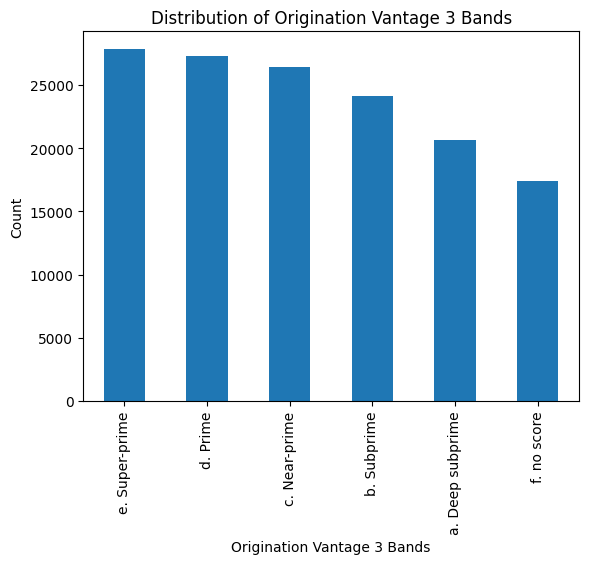

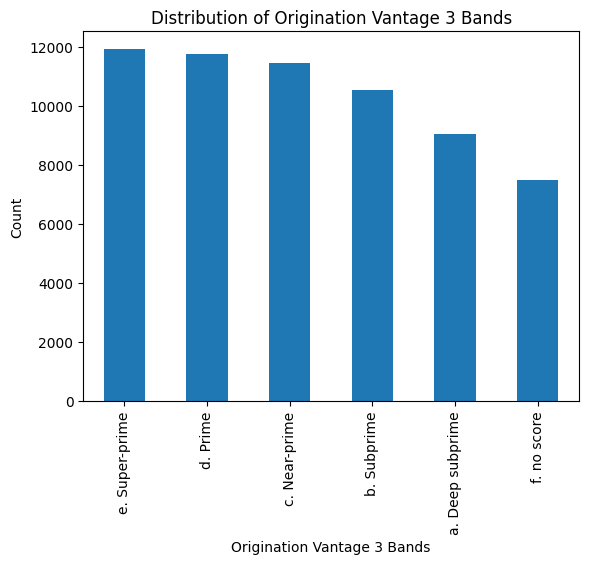

In [17]:
#Distribution of 'origvs3_band'
origination_21_df['origvs3_band'].value_counts().plot(kind='bar')
plt.title('Distribution of Origination Vantage 3 Bands')
plt.xlabel('Origination Vantage 3 Bands')
plt.ylabel('Count')
plt.show()

origination_23_df['origvs3_band'].value_counts().plot(kind='bar')
plt.title('Distribution of Origination Vantage 3 Bands')
plt.xlabel('Origination Vantage 3 Bands')
plt.ylabel('Count')
plt.show()

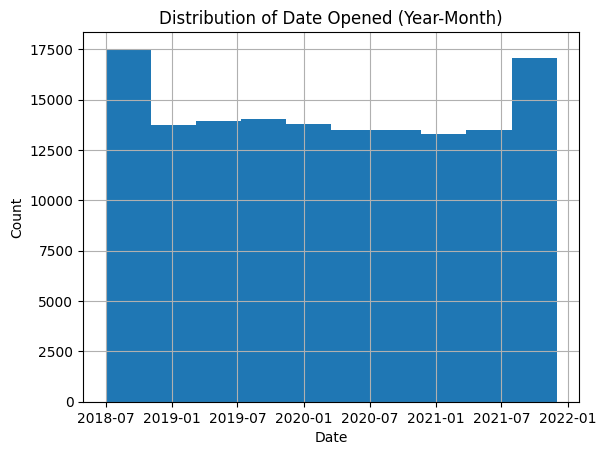

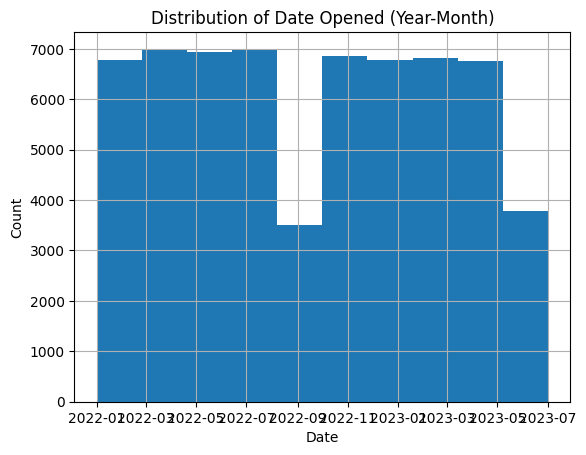

In [20]:
origination_21_df['dateOpenedyyyymm'] = pd.to_datetime(origination_21_df['dateOpenedyyyymm'], format='%Y%m')
origination_21_df['dateOpenedyyyymm'].hist()
plt.title('Distribution of Date Opened (Year-Month)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

origination_23_df['dateopenedyyyymm'] = pd.to_datetime(origination_23_df['dateopenedyyyymm'], format='%Y%m')
origination_23_df['dateopenedyyyymm'].hist()
plt.title('Distribution of Date Opened (Year-Month)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

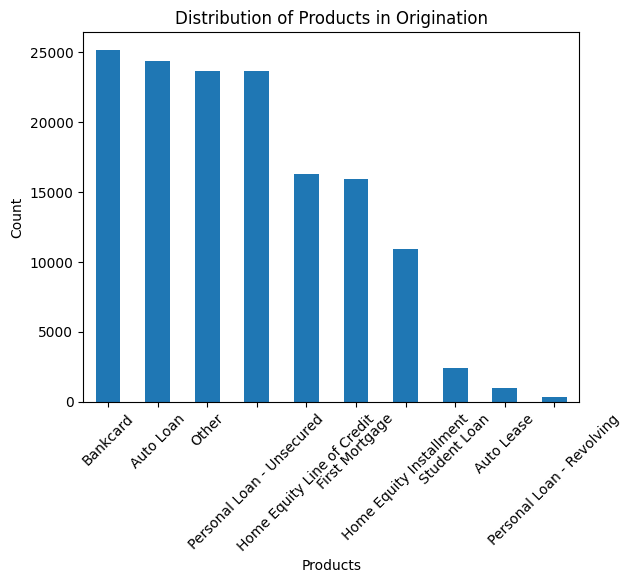

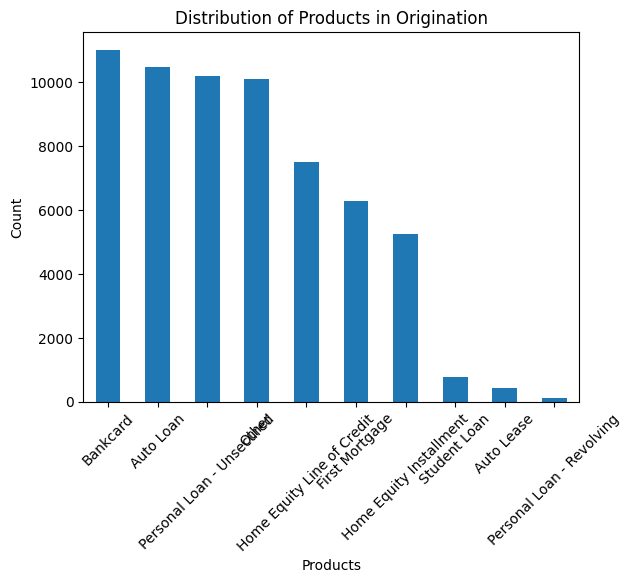

In [21]:
# Distribution of 'product2'
origination_21_df['product2'].value_counts().plot(kind='bar')
plt.title('Distribution of Products in Origination')
plt.xlabel('Products')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

origination_23_df['product2'].value_counts().plot(kind='bar')
plt.title('Distribution of Products in Origination')
plt.xlabel('Products')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [22]:
origination_21_summary = origination_21_df[['totaltrade', 'balance', 'hc', 'originationvantagescore3', 'freq_originationvantagescore3']].describe()
print(origination_21_summary)

origination_23_summary = origination_23_df[['totaltrade', 'balance', 'hc', 'originationvantagescore3', 'freq_originationvantagescore3']].describe()
print(origination_23_summary)

          totaltrade       balance            hc  originationvantagescore3  \
count  143753.000000  1.437530e+05  1.437530e+05              1.437530e+05   
mean      190.303604  4.830848e+06  5.435641e+06              1.276989e+05   
std       662.113191  3.036189e+07  3.098278e+07              4.619050e+05   
min         1.000000  0.000000e+00  0.000000e+00              0.000000e+00   
25%         9.000000  5.683900e+04  9.810000e+04              2.587000e+03   
50%        39.000000  3.272140e+05  4.878200e+05              2.038300e+04   
75%       134.000000  1.765836e+06  2.407528e+06              8.556300e+04   
max     21991.000000  2.055362e+09  2.057790e+09              1.508184e+07   

       freq_originationvantagescore3  
count                  143753.000000  
mean                      182.726107  
std                       657.497493  
min                         0.000000  
25%                         4.000000  
50%                        32.000000  
75%                     

In [23]:
origination_21_corr = origination_21_df.corr()
print(origination_21_corr)

origination_23_corr = origination_23_df.corr()
print(origination_23_corr)

                               totaltrade   balance        hc  \
totaltrade                       1.000000  0.367129  0.434171   
balance                          0.367129  1.000000  0.988174   
hc                               0.434171  0.988174  1.000000   
originationvantagescore3         0.983935  0.394864  0.463578   
freq_originationvantagescore3    0.989848  0.371252  0.438329   

                               originationvantagescore3  \
totaltrade                                     0.983935   
balance                                        0.394864   
hc                                             0.463578   
originationvantagescore3                       1.000000   
freq_originationvantagescore3                  0.994028   

                               freq_originationvantagescore3  
totaltrade                                          0.989848  
balance                                             0.371252  
hc                                                  0.438329  
or

In [26]:
#Frequency of 'lookup_nm'
lookup_nm_counts_21 = origination_21_df['lookup_nm'].value_counts()
print(lookup_nm_counts_21)

lookup_nm_counts_23 = origination_23_df['lookup_nm'].value_counts()
print(lookup_nm_counts_23)


lender_77     2137
lender_71     1892
lender_73     1884
lender_36     1868
lender_80     1847
              ... 
lender_53     1103
lender_98     1008
lender_99      254
lender_100     252
lender_95      252
Name: lookup_nm, Length: 100, dtype: int64
lender_77     871
lender_80     807
lender_36     776
lender_73     769
lender_18     765
             ... 
lender_53     497
lender_98     438
lender_99     114
lender_100    114
lender_95     114
Name: lookup_nm, Length: 100, dtype: int64


In [30]:
portfolio_df['n_30p_dpd_delq_ratio'] = portfolio_df['n_30p_dpd_delq'] / portfolio_df['n_dlq_denominator']
portfolio_df['n_60p_dpd_delq_ratio'] = portfolio_df['n_60p_dpd_delq'] / portfolio_df['n_dlq_denominator']
portfolio_df['n_90p_dpd_delq_ratio'] = portfolio_df['n_90p_dpd_delq'] / portfolio_df['n_dlq_denominator']
portfolio_df['n_writeoff_ratio'] = portfolio_df['n_writeoff'] / portfolio_df['n_dlq_denominator']
portfolio_df['bal_30p_dpd_delq_ratio'] = portfolio_df['bal_30p_dpd_delq'] / portfolio_df['bal_dlq_denominator']
portfolio_df['bal_60p_dpd_delq_ratio'] = portfolio_df['bal_60p_dpd_delq'] / portfolio_df['bal_dlq_denominator']
portfolio_df['bal_90p_dpd_delq_ratio'] = portfolio_df['bal_90p_dpd_delq'] / portfolio_df['bal_dlq_denominator']
portfolio_df['bal_writeoff_ratio'] = portfolio_df['bal_writeoff'] / portfolio_df['bal_dlq_denominator']

In [31]:
portfolio_df['avg_vantagescore3'] = portfolio_df['vantagescore3'] / portfolio_df['freq_vantagescore3']

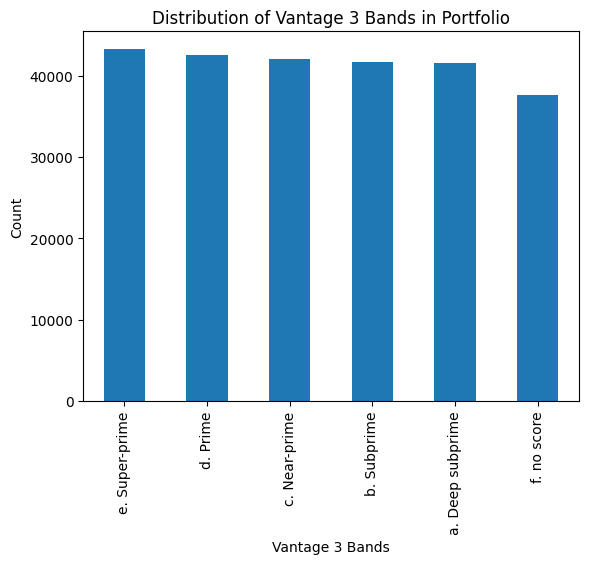

In [24]:
#Distribution of 'vs3_band'
portfolio_df['vs3_band'].value_counts().plot(kind='bar')
plt.title('Distribution of Vantage 3 Bands in Portfolio')
plt.xlabel('Vantage 3 Bands')
plt.ylabel('Count')
plt.show()

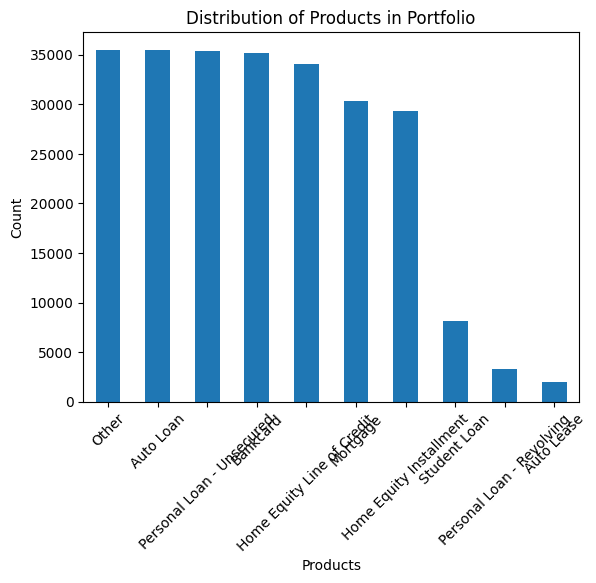

In [27]:
# Distribution of 'product_2'
portfolio_df['product_2'].value_counts().plot(kind='bar')
plt.title('Distribution of Products in Portfolio')
plt.xlabel('Products')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

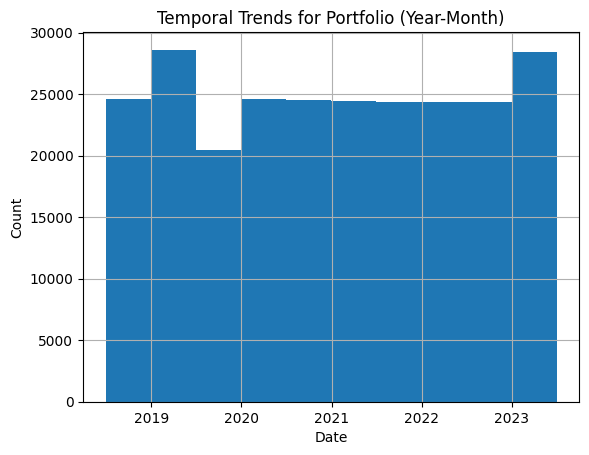

In [28]:
#Temporal trends for 'archive'
portfolio_df['archive'] = pd.to_datetime(portfolio_df['archive'], format='%Y%m')
portfolio_df['archive'].hist()
plt.title('Temporal Trends for Portfolio (Year-Month)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


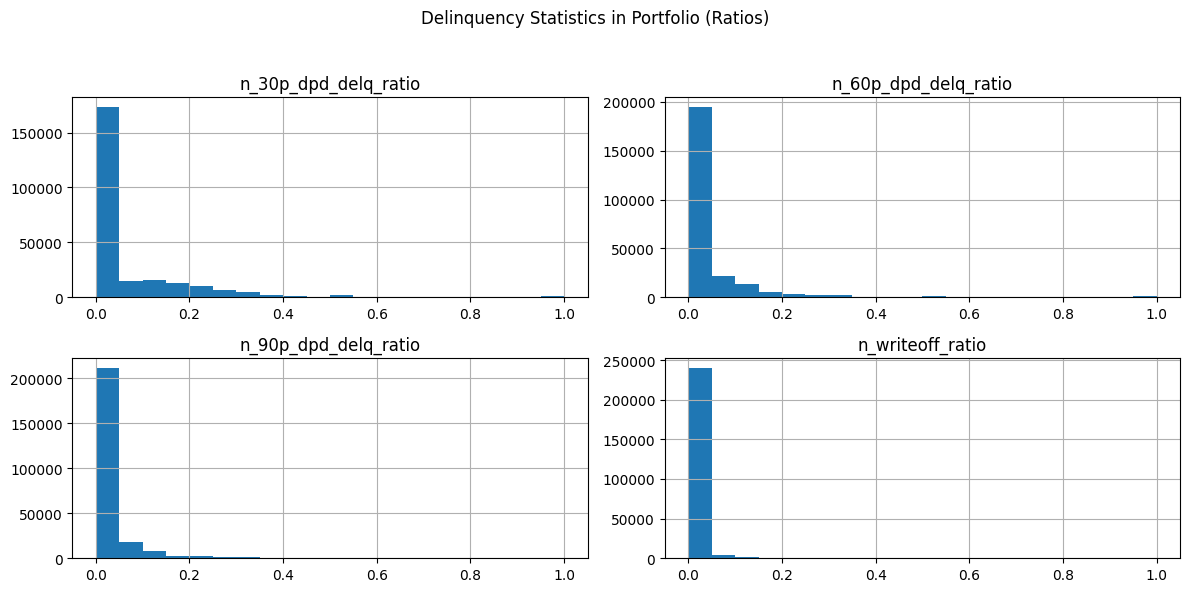

In [32]:
#Delinquency statistics
delinquency_columns = ['n_30p_dpd_delq_ratio', 'n_60p_dpd_delq_ratio', 'n_90p_dpd_delq_ratio', 'n_writeoff_ratio']
portfolio_df[delinquency_columns].hist(figsize=(12, 6), bins=20)
plt.suptitle('Delinquency Statistics in Portfolio (Ratios)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

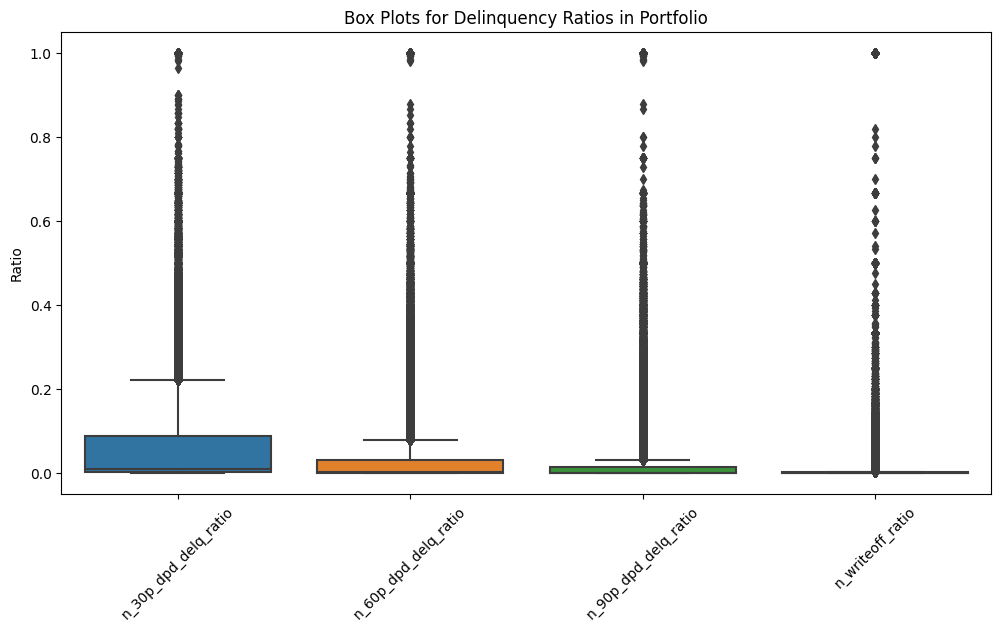

In [35]:
# Box Plots for Delinquency Ratios
delinquency_ratio_columns = ['n_30p_dpd_delq_ratio', 'n_60p_dpd_delq_ratio', 'n_90p_dpd_delq_ratio', 'n_writeoff_ratio']

plt.figure(figsize=(12, 6))
sns.boxplot(data=portfolio_df[delinquency_ratio_columns])
plt.title('Box Plots for Delinquency Ratios in Portfolio')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.show()

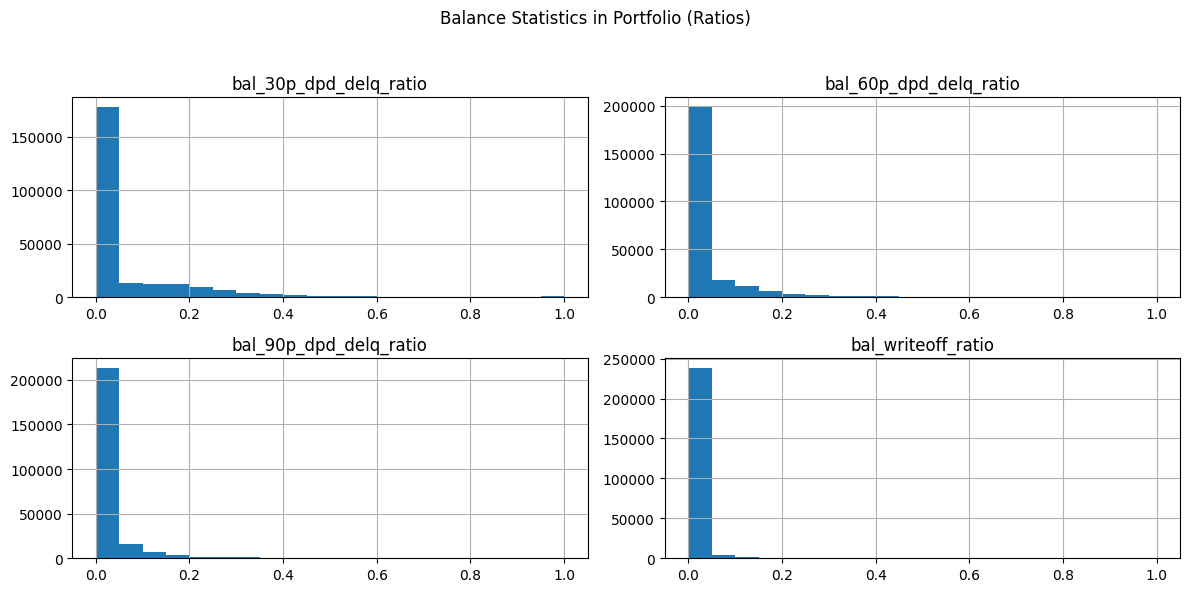

In [36]:
# 5. Balance statistics (including calculated ratios)
balance_columns = ['bal_30p_dpd_delq_ratio', 'bal_60p_dpd_delq_ratio', 'bal_90p_dpd_delq_ratio', 'bal_writeoff_ratio']
portfolio_df[balance_columns].hist(figsize=(12, 6), bins=20)
plt.suptitle('Balance Statistics in Portfolio (Ratios)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

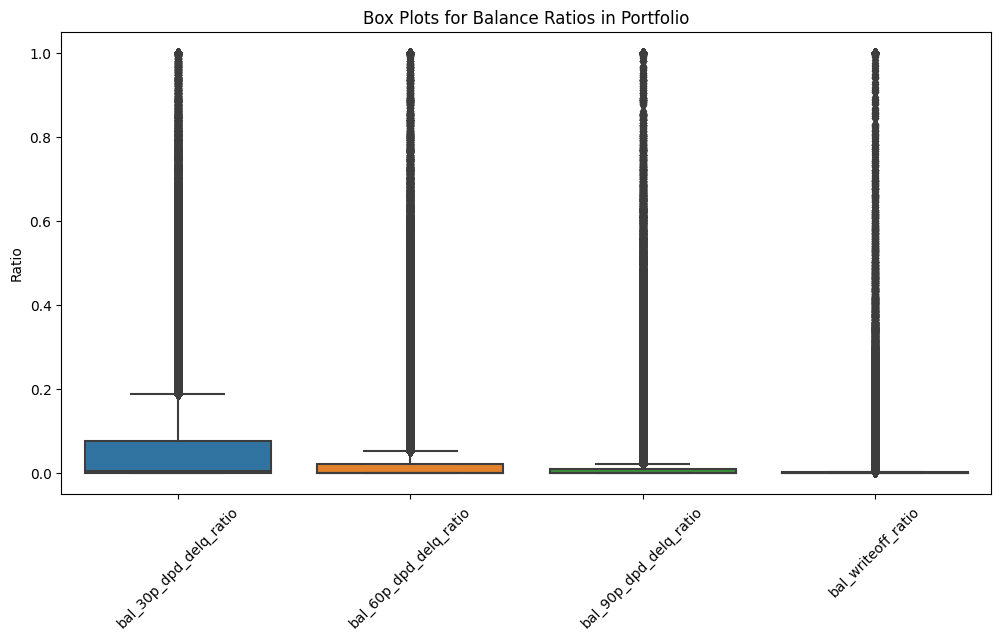

In [37]:
# Box Plots for Balance Statistics
plt.figure(figsize=(12, 6))
sns.boxplot(data=portfolio_df[balance_columns])
plt.title('Box Plots for Balance Ratios in Portfolio')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.show()


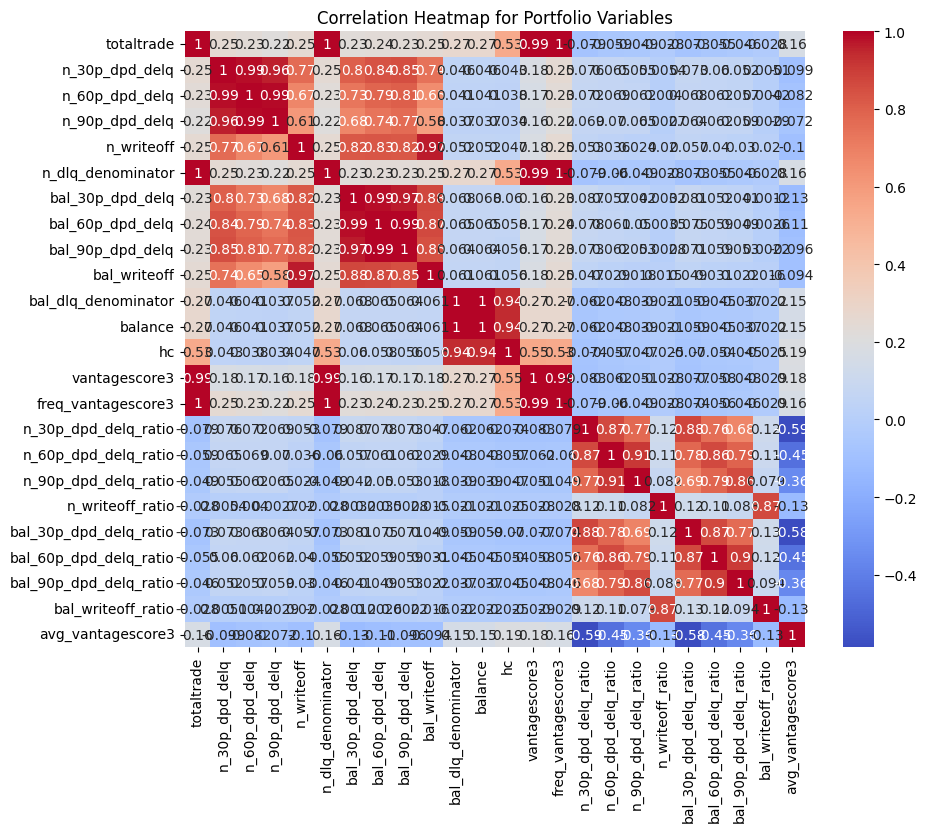

In [38]:
portfolio_corr = portfolio_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(portfolio_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Portfolio Variables')
plt.show()

In [39]:
lookup_nm_counts = portfolio_df['lookup_nm'].value_counts()
print(lookup_nm_counts)

lender_18     3268
lender_35     3241
lender_73     3221
lender_78     3146
lender_93     3141
              ... 
lender_90     1819
lender_98     1464
lender_99      542
lender_95      394
lender_100     377
Name: lookup_nm, Length: 100, dtype: int64


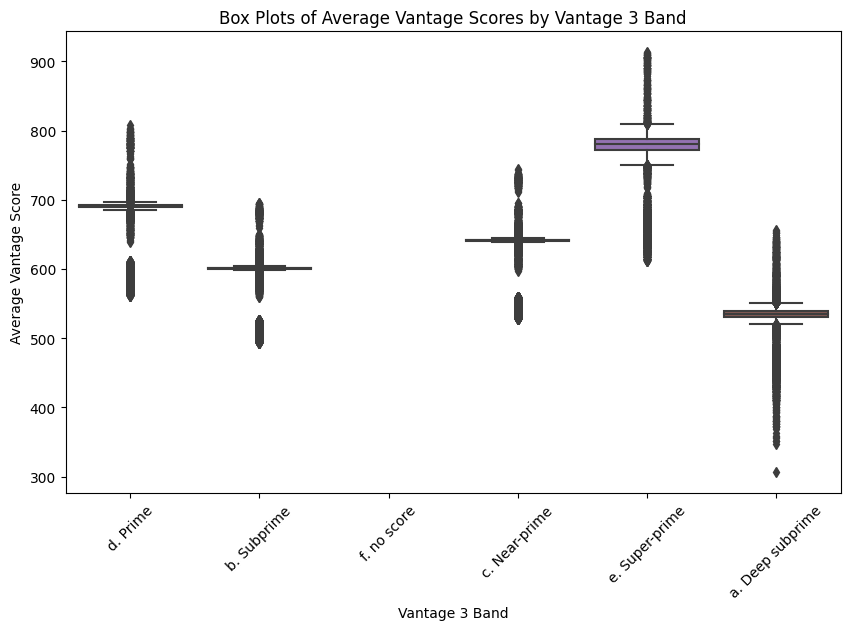

In [43]:
# Box Plots for Vantage Scores by Vantage 3 Band
plt.figure(figsize=(10, 6))
sns.boxplot(data=portfolio_df, x='vs3_band', y='avg_vantagescore3')
plt.title('Box Plots of Average Vantage Scores by Vantage 3 Band')
plt.xlabel('Vantage 3 Band')
plt.ylabel('Average Vantage Score')
plt.xticks(rotation=45)
plt.show()